The following information is based on the Open University Learning Analytics Dataset (OULAD): https://www.kaggle.com/anlgrbz/student-demographics-online-education-dataoulad
Accessed: 19.06.21

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# import studentInfo.csv
dfstudent = pd.read_csv ('~/Datascience/OUdata/studentInfo.csv')

In [3]:
# import studentVLE.csv 
dfVLE = pd.read_csv ('~/Datascience/OUdata/studentVLE.csv')

In [4]:
# Explore the student info dataframe column structure
dfstudent.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [5]:
#Explore an overview of the student info data
dfstudent.shape

(32593, 12)

In [6]:
dfstudent.describe ()

,id_student,num_of_prev_attempts,studied_credits
count,3.259300e+04,32593.000000,32593.000000
mean,7.066877e+05,0.163225,79.758691
std,5.491673e+05,0.479758,41.071900
min,3.733000e+03,0.000000,30.000000
25%,5.085730e+05,0.000000,60.000000
50%,5.903100e+05,0.000000,60.000000
75%,6.444530e+05,0.000000,120.000000
max,2.716795e+06,6.000000,655.000000


In [7]:
dfstudent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


In [8]:
#groupby age_band
dfstudent.groupby('age_band').count()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,num_of_prev_attempts,studied_credits,disability,final_result
age_band,,,,,,,,,,,
0-35,22944,22944,22944,22944,22944,22944,22272,22944,22944,22944,22944
35-55,9433,9433,9433,9433,9433,9433,9009,9433,9433,9433,9433
55<=,216,216,216,216,216,216,201,216,216,216,216


In [9]:
#groupby gender
dfstudent.groupby('gender').count()

,code_module,code_presentation,id_student,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
gender,,,,,,,,,,,
F,14718,14718,14718,14718,14718,14415,14718,14718,14718,14718,14718
M,17875,17875,17875,17875,17875,17067,17875,17875,17875,17875,17875


In [10]:
dfstudent.tail()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn
32592,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction


In [11]:
#check for duplications in the data
dfstudent.duplicated().value_counts()

False    32593
dtype: int64

In [12]:
 #create a series 'gender'
dfgender = dfstudent["gender"]
print (dfgender)

0        M
1        F
2        F
3        F
4        F
        ..
32588    F
32589    F
32590    F
32591    F
32592    F
Name: gender, Length: 32593, dtype: object


In [13]:
dfgender.head()

0    M
1    F
2    F
3    F
4    F
Name: gender, dtype: object

In [14]:
#Look at M/F breakdown
dfgender.value_counts()

M    17875
F    14718
Name: gender, dtype: int64

In [15]:
#create a series based on gender and final result
dfgender_result = dfstudent[["gender","final_result"]]

In [16]:
dfgender_result.head()

,gender,final_result
0,M,Pass
1,F,Pass
2,F,Withdrawn
3,F,Pass
4,F,Pass


In [16]:
dfgender_result.tail(20)

,gender,final_result
32573,F,Pass
32574,M,Withdrawn
32575,F,Pass
32576,F,Withdrawn
32577,M,Withdrawn
32578,F,Withdrawn
32579,M,Distinction
32580,F,Fail
32581,F,Fail
32582,F,Fail


In [18]:
#replace string descriptors with numeric values to enable plotting
dfstudent['gender'].replace(['M','F'],[0,1],inplace=True)
print (dfstudent)

      code_module code_presentation  id_student  gender                region  \
0             AAA             2013J       11391       0   East Anglian Region   
1             AAA             2013J       28400       1              Scotland   
2             AAA             2013J       30268       1  North Western Region   
3             AAA             2013J       31604       1     South East Region   
4             AAA             2013J       32885       1  West Midlands Region   
...           ...               ...         ...     ...                   ...   
32588         GGG             2014J     2640965       1                 Wales   
32589         GGG             2014J     2645731       1   East Anglian Region   
32590         GGG             2014J     2648187       1          South Region   
32591         GGG             2014J     2679821       1     South East Region   
32592         GGG             2014J     2684003       1      Yorkshire Region   

           highest_educatio

In [19]:
#check effective replacement of M/F with 0/1
dfstudent.head(10)

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,0,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,1,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,1,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,1,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,1,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass
5,AAA,2013J,38053,0,Wales,A Level or Equivalent,80-90%,35-55,0,60,N,Pass
6,AAA,2013J,45462,0,Scotland,HE Qualification,30-40%,0-35,0,60,N,Pass
7,AAA,2013J,45642,1,North Western Region,A Level or Equivalent,90-100%,0-35,0,120,N,Pass
8,AAA,2013J,52130,1,East Anglian Region,A Level or Equivalent,70-80%,0-35,0,90,N,Pass
9,AAA,2013J,53025,0,North Region,Post Graduate Qualification,NaN,55<=,0,60,N,Pass


In [20]:
#replace final result string categories with numeric values in a 'code' column
#withdrawn = 4
#pass = 3
#fail = 2
#distinction = 1
dfstudent['code'] = pd.factorize(dfstudent['final_result'], sort=True)[0] + 1

In [21]:
dfstudent.head(10)

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,code
0,AAA,2013J,11391,0,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,3
1,AAA,2013J,28400,1,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,3
2,AAA,2013J,30268,1,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,4
3,AAA,2013J,31604,1,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,3
4,AAA,2013J,32885,1,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,3
5,AAA,2013J,38053,0,Wales,A Level or Equivalent,80-90%,35-55,0,60,N,Pass,3
6,AAA,2013J,45462,0,Scotland,HE Qualification,30-40%,0-35,0,60,N,Pass,3
7,AAA,2013J,45642,1,North Western Region,A Level or Equivalent,90-100%,0-35,0,120,N,Pass,3
8,AAA,2013J,52130,1,East Anglian Region,A Level or Equivalent,70-80%,0-35,0,90,N,Pass,3
9,AAA,2013J,53025,0,North Region,Post Graduate Qualification,NaN,55<=,0,60,N,Pass,3


In [22]:
#show conversion of final_result categories
dfstudent.iloc[:,11:13]

,final_result,code
0,Pass,3
1,Pass,3
2,Withdrawn,4
3,Pass,3
4,Pass,3
...,...,...
32588,Fail,2
32589,Distinction,1
32590,Pass,3
32591,Withdrawn,4


In [23]:
#create a series based on gender and final result following chnges to numeric values
dfgender_result2 = dfstudent[["gender","code"]]

In [24]:
dfgender_result2.head(3)

,gender,code
0,0,3
1,1,3
2,1,4


array([[<AxesSubplot:xlabel='gender', ylabel='gender'>,
        <AxesSubplot:xlabel='code', ylabel='gender'>],
       [<AxesSubplot:xlabel='gender', ylabel='code'>,
        <AxesSubplot:xlabel='code', ylabel='code'>]], dtype=object)

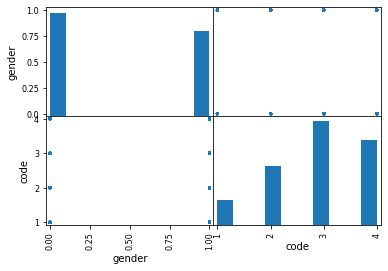

In [25]:
pd.plotting.scatter_matrix(dfgender_result2)

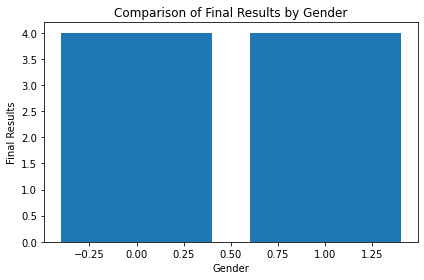

In [26]:
#try and create a bar chart to show final outcomes by gender

fig, ax = plt.subplots()

ax.bar(dfgender_result2['gender'], dfgender_result2['code'])
ax.set_xlabel('Gender')
ax.set_ylabel('Final Results')

ax.set_title('Comparison of Final Results by Gender')

plt.tight_layout()


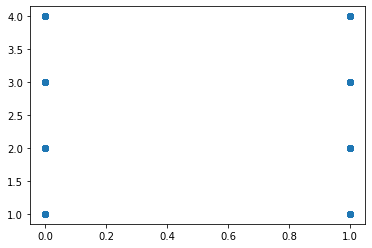

In [27]:
#see if a scatter is more appropriate
x = dfstudent.gender
y = dfstudent.code
plt.scatter(x, y)
plt.show()  



In [53]:
dfresults = dfstudent["final_result"]
dfresults.value_counts()


Pass           12361
Withdrawn      10156
Fail            7052
Distinction     3024
Name: final_result, dtype: int64

In [85]:
dfstudent.groupby(['code','gender',]).count()

code_module  code_presentation  id_student  region  \
code gender                                                       
1    0              1630               1630        1630    1630   
     1              1394               1394        1394    1394   
2    0              3949               3949        3949    3949   
     1              3103               3103        3103    3103   
3    0              6626               6626        6626    6626   
     1              5735               5735        5735    5735   
4    0              5670               5670        5670    5670   
     1              4486               4486        4486    4486   

             highest_education  imd_band  age_band  num_of_prev_attempts  \
code gender                                                                
1    0                    1630      1488      1630                  1630   
     1                    1394      1337      1394                  1394   
2    0                    3949      3841      3949                  3949   
     1                    3103      3066      3103                  3103   
3    0                    6626      6239      6626                  6626   
     1                    5735      5591      5735                  5735   
4    0                    5670      5499      5670                  5670   
     1                    4486      4421      4486                  4486   

             studied_credits  disability  final_result  
code gender                                             
1    0                  1630        1630          1630  
     1                  1394        1394          1394  
2    0                  3949        3949          3949  
     1                  3103        3103          3103  
3    0                  6626        6626          6626  
     1                  5735        5735          5735  
4    0                  5670        5670          5670  
     1                  4486        4486          4486

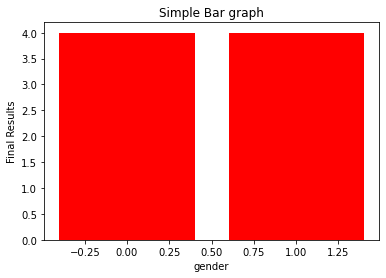

In [83]:
plt.title("Simple Bar graph") # Name title of the graph
plt.xlabel('gender') # Assign the name of the x axis
plt.ylabel("Final Results") # Assign the name of the y axis
plt.bar(x, y, color='red') # Change bar color
plt.show()

In [90]:
men_df = dfstudent.loc[dfstudent['gender'] == 0]
print (men_df)

      code_module code_presentation  id_student  gender                region  \
0             AAA             2013J       11391       0   East Anglian Region   
5             AAA             2013J       38053       0                 Wales   
6             AAA             2013J       45462       0              Scotland   
9             AAA             2013J       53025       0          North Region   
10            AAA             2013J       57506       0          South Region   
...           ...               ...         ...     ...                   ...   
32570         GGG             2014J     2239862       0  North Western Region   
32574         GGG             2014J     2282141       0                 Wales   
32577         GGG             2014J     2342238       0               Ireland   
32579         GGG             2014J     2373245       0  East Midlands Region   
32586         GGG             2014J     2608143       0  East Midlands Region   

                 highest_ed

In [96]:
women_df = dfstudent.loc[dfstudent['gender'] == 1]
women_df.head(10)


,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,code
1,AAA,2013J,28400,1,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,3
2,AAA,2013J,30268,1,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,4
3,AAA,2013J,31604,1,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,3
4,AAA,2013J,32885,1,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,3
7,AAA,2013J,45642,1,North Western Region,A Level or Equivalent,90-100%,0-35,0,120,N,Pass,3
8,AAA,2013J,52130,1,East Anglian Region,A Level or Equivalent,70-80%,0-35,0,90,N,Pass,3
11,AAA,2013J,58873,1,East Anglian Region,A Level or Equivalent,20-30%,0-35,0,60,N,Pass,3
13,AAA,2013J,62155,1,North Western Region,HE Qualification,50-60%,0-35,0,60,N,Pass,3
15,AAA,2013J,65002,1,East Anglian Region,A Level or Equivalent,70-80%,0-35,0,60,N,Withdrawn,4
16,AAA,2013J,70464,1,West Midlands Region,A Level or Equivalent,60-70%,35-55,0,60,N,Pass,3


In [99]:
mencats = men_df[["gender","code"]]
mencats.sum()

gender        0
code      52086
dtype: int64

In [101]:
womencats = women_df[["gender","code"]]
womencats.sum()

gender    14718
code      42749
dtype: int64

Text(0, 0.5, 'results')

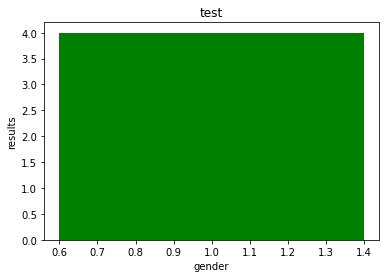

In [119]:
fig, ax = plt.subplots()
ax.bar(womencats['gender'],
       womencats['code'],
       color='g')
ax.set_title('test')
ax.set_xlabel('gender')
ax.set_ylabel('results')